# 1.创建示例数据：

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon

In [2]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys1

0    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
1    POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....
dtype: geometry

In [3]:
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),Polygon([(3,3), (5,3), (5,5), (3,5)])])
polys2

0    POLYGON ((1.00000 1.00000, 3.00000 1.00000, 3....
1    POLYGON ((3.00000 3.00000, 5.00000 3.00000, 5....
dtype: geometry

In [4]:
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df1

,geometry,df1
0,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",1
1,"POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....",2


In [5]:
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})
df2

,geometry,df2
0,"POLYGON ((1.00000 1.00000, 3.00000 1.00000, 3....",1
1,"POLYGON ((3.00000 3.00000, 5.00000 3.00000, 5....",2


### 这两个GeoDataFrames有一些重叠的区域。

<AxesSubplot:>

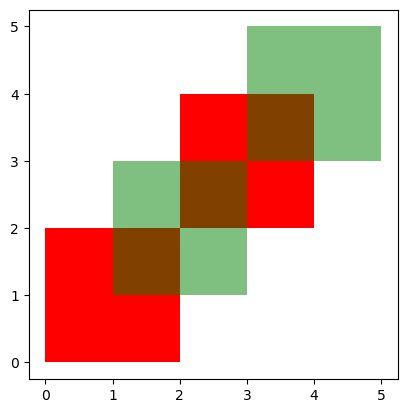

In [6]:
ax = df1.plot(color='red')
df2.plot(ax=ax, color='green', alpha=0.5)

# 2.The different Overlay operations

### 当how=’union’

In [7]:
res_union = df1.overlay(df2 , how="union")
res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."
5,NaN,1.0,"MULTIPOLYGON (((2.00000 2.00000, 3.00000 2.000..."
6,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


<AxesSubplot:>

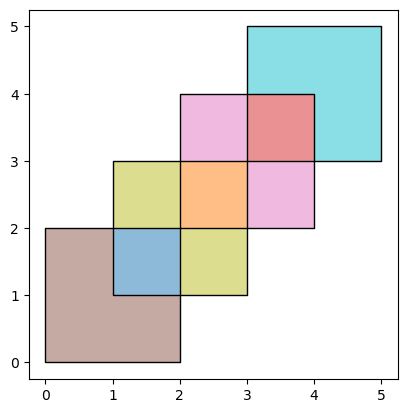

In [8]:
ax = res_union.plot(alpha=0.5, cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

### how=’intersection’

In [9]:
res_intersection = df1.overlay(df2, how='intersection')
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2,1,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,2,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."


<AxesSubplot:>

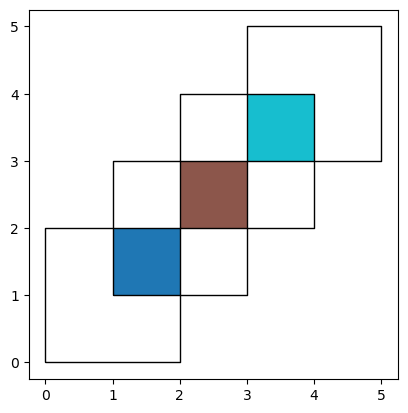

In [10]:
ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

### how=’symmetric_difference’

In [11]:
res_symdiff = df1.overlay(df2, how='symmetric_difference')
res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
1,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."
2,NaN,1.0,"MULTIPOLYGON (((2.00000 2.00000, 3.00000 2.000..."
3,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


<AxesSubplot:>

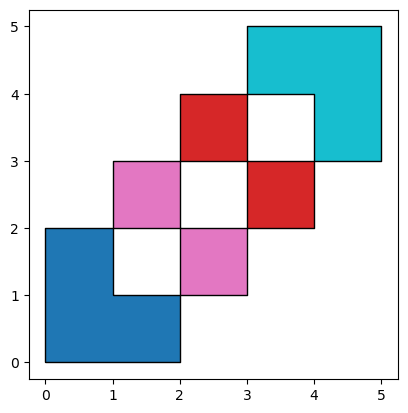

In [12]:
ax = res_symdiff.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

### how=’difference’

In [13]:
res_difference = df1.overlay(df2, how='difference')
res_difference

,geometry,df1
0,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....",1
1,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000...",2


<AxesSubplot:>

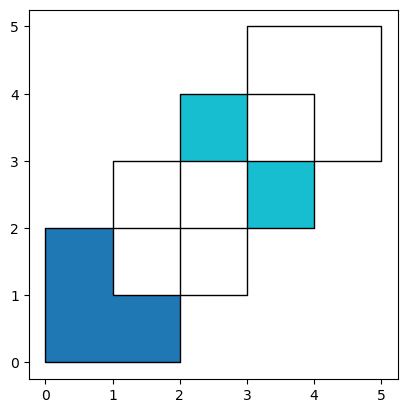

In [14]:
ax = res_difference.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

### how=’identity’

In [15]:
res_identity = df1.overlay(df2, how='identity')
res_identity

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."


<AxesSubplot:>

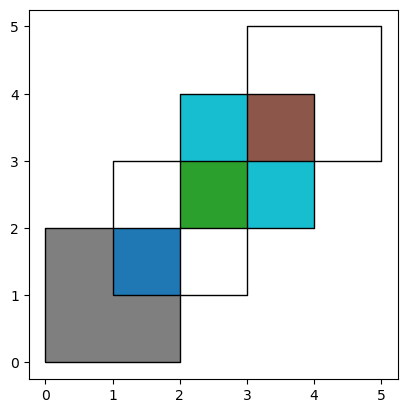

In [16]:
ax = res_identity.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

# 3.Overlay Countries Example

### 首先，加载国家和城市示例数据集并进行筛选：

In [17]:
world = gpd.read_file('./datasets/naturalearth_lowres/naturalearth_lowres.shp')
capitals = gpd.read_file('./datasets/naturalearth_cities/naturalearth_cities.shp')

In [18]:
# 选择南美洲
countries = world[world['continent'] == "South America"]

In [19]:
# 只选择两列数据
countries = countries[['geometry', 'name']]

In [20]:
# 转换为投影坐标系
countries = countries.to_crs('epsg:3395')

capitals = capitals.to_crs('epsg:3395')

In [21]:
countries

,geometry,name
9,"MULTIPOLYGON (((-7640303.070 -6882033.443, -75...",Argentina
10,"MULTIPOLYGON (((-7640303.070 -6882033.443, -76...",Chile
20,"POLYGON ((-6812752.837 -6739425.098, -6679169....",Falkland Is.
28,"POLYGON ((-6414800.510 -3509882.507, -6342542....",Uruguay
29,"POLYGON ((-5941528.839 -3973993.738, -5972351....",Brazil
30,"POLYGON ((-7740008.362 -1218521.331, -7657240....",Bolivia
31,"POLYGON ((-7780523.882 -475721.281, -7880837.6...",Peru
32,"POLYGON ((-7444638.540 138600.632, -7465647.01...",Colombia
40,"POLYGON ((-6760830.552 575818.568, -6746092.40...",Venezuela
41,"POLYGON ((-6293935.631 210077.339, -6321021.72...",Guyana


<AxesSubplot:>

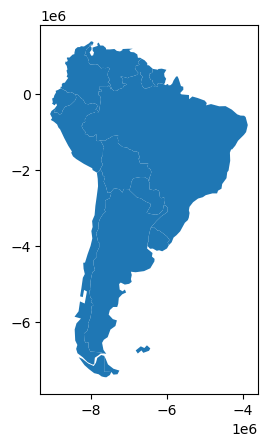

In [22]:
countries.plot()

In [23]:
capitals

,name,geometry
0,Vatican City,POINT (1386304.644 5117957.427)
1,San Marino,POINT (1385011.523 5425900.271)
2,Vaduz,POINT (1059390.803 5932596.005)
3,Lobamba,POINT (3473167.790 -3037957.646)
4,Luxembourg,POINT (682388.790 6346728.175)
...,...,...
238,Rio de Janeiro,POINT (-4810350.913 -2604187.631)
239,São Paulo,POINT (-5190490.090 -2682415.950)
240,Sydney,POINT (16832903.820 -3987730.441)
241,Singapore,POINT (11560960.460 143203.754)


<AxesSubplot:>

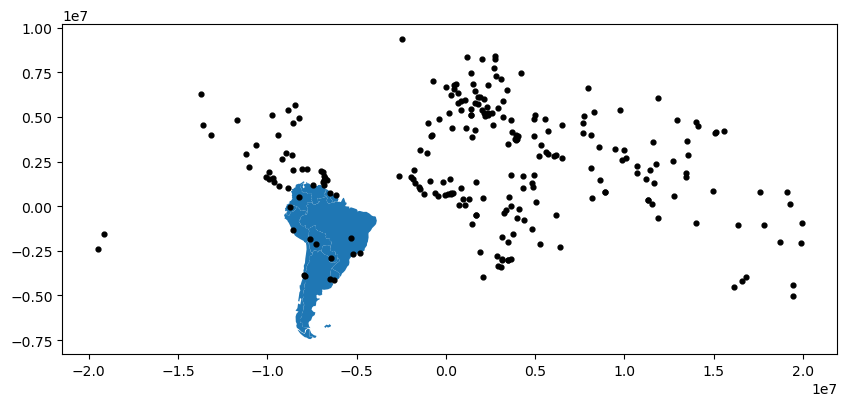

In [24]:
ax = countries.plot(figsize=(10,8))
capitals.plot(ax=ax ,color="k" , markersize=12)

### 假设我们希望使用国家 GeoDataFrame 和首都 GeoDataFrame 来识别每个国家的“核心”部分——定义为首都 500 公里以内的区域。

In [25]:
# 生成 500km 缓冲区
capitals['geometry']= capitals.buffer(500000)

<AxesSubplot:>

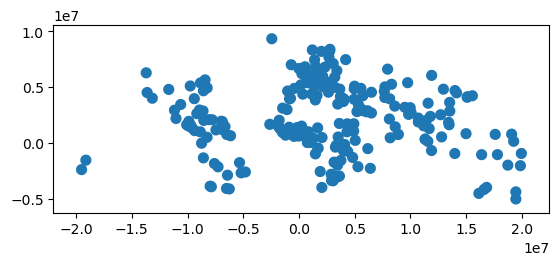

In [26]:
capitals.plot()

### 为了只选择首都500公里范围内的国家部分，我们指定how='intersection'，这将在这两层重叠的地方创建一个新的多边形集合。

In [27]:
country_cores = countries.overlay(capitals, how='intersection')
country_cores.head()

,name_1,name_2,geometry
0,Argentina,Montevideo,"POLYGON ((-6472386.854 -3746485.160, -6471296...."
1,Uruguay,Montevideo,"POLYGON ((-6074977.517 -3674819.184, -5987647...."
2,Brazil,Montevideo,"POLYGON ((-5972351.238 -3898750.836, -5923264...."
3,Argentina,Asunción,"POLYGON ((-6773408.599 -2721587.353, -6682393...."
4,Brazil,Asunción,"POLYGON ((-6266274.282 -3336304.139, -6140637...."


<AxesSubplot:>

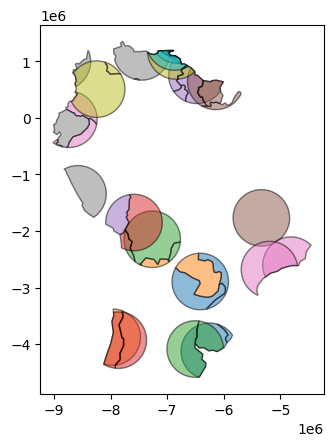

In [28]:
country_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10')

### 改变 “how “参数可以进行不同类型的叠加操作。例如，如果我们对远离首都的国家部分（边缘地区）感兴趣，我们将计算两者的差值。

<AxesSubplot:>

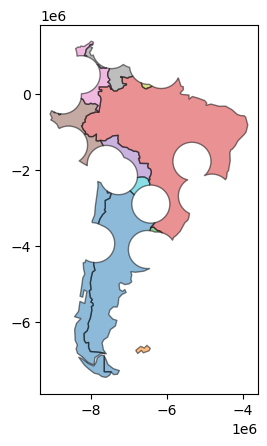

In [29]:
country_peripheries = countries.overlay(capitals, how='difference')

country_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10')